In [1]:
# Install the wordcloud library
! pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 653.6 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 653.6 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 535.8 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 535.8 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 546.6 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 546.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 541.9 kB/s eta 0:00:01
   ------------

## Import the Text Material

In [9]:
# We use the content from the Wikipedia page

import requests

def wikipedia_page(title) : 
    '''This function returns the raw text of a wikipedia page
    given a wikipedia page title'''
    
    params = {
        'action' : 'query',
        'format' : 'json', # request json formatted content
        'titles' : title, # title of the wikipedia page
        'prop' : 'extracts',
        'explaintext' : True
    }
    
    # send a request to wikipedia page API
    response = requests.get(
        'https://en.wikipedia.org/w/api.php',
        params=params
                           ).json()
    
    # Parse the results
    page = next(iter(response['query']['pages'].values()))
    
    # Return the page content
    if 'extract' in page.keys():
        return page['extract']
    else : 
        return 'Page not found'

In [10]:
# Lets get the text from the wikipedia_page function
# We'll be using the 'Earth' article to get the words for this round

text = wikipedia_page('Earth').lower()

# We can use other articles such as : 'Harry Potter', 'dogs', 'Star Trek', or 'coffee'.

## Create the WordCloud
The goal is to understand better what Wikipedia’s Earth page is about without reading it.

In [11]:
from wordcloud import WordCloud

# Instantiate / Create a new wordcloud
wordcloud = WordCloud(
    random_state=8,
    normalize_plurals=False,
    width=600,
    height=300,
    max_words=300,
    stopwords=[]
                     )

# Apply the above wordcloud to the text
wordcloud.generate(text)

Matplotlib is building the font cache; this may take a moment.


## Display the wordcloud using the Matplotlib

(-0.5, 599.5, 299.5, -0.5)

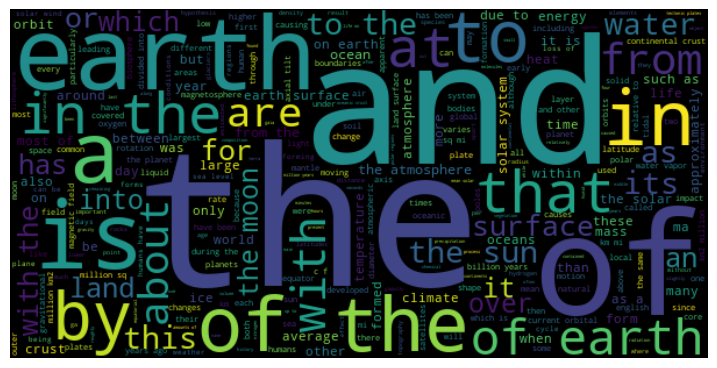

In [12]:
# Import the matplotlib 
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots(1,1, figsize=(9,6))

# Add interpolation : Bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# Remove the axis from the wordcloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

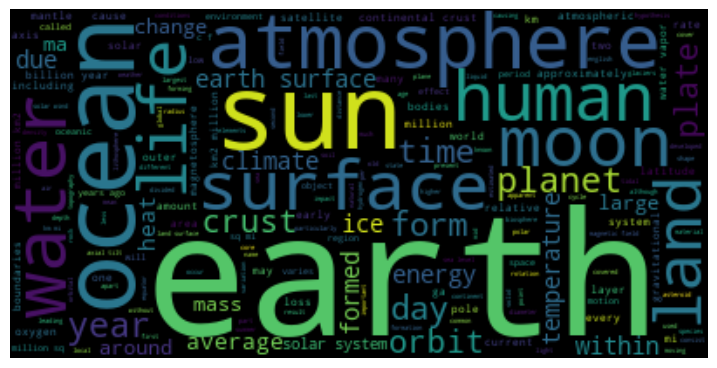

In [14]:
# Using the default wordcloud parameters
wordcloud2 = WordCloud()

# applying it on the text
wordcloud2.generate(text)

# Create a figure
fig, ax = plt.subplots(1,1, figsize=(9,6))

# Add interpolation : Bilinear to smooth things out
plt.imshow(wordcloud2, interpolation='bilinear')

# Remove the axis from the wordcloud
plt.axis('off')

### Createing the wordcloud for the 'Harry potter' article

(-0.5, 399.5, 199.5, -0.5)

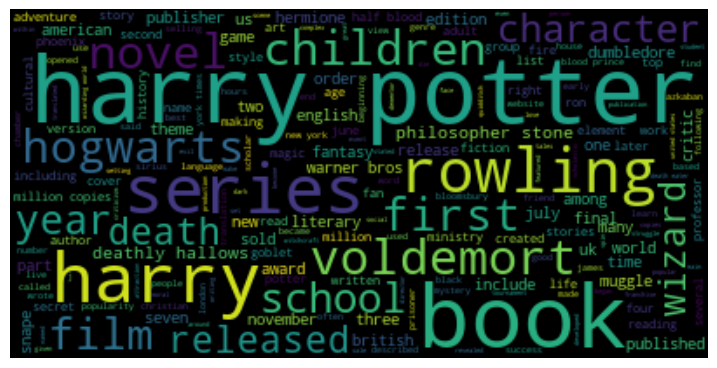

In [16]:
# Extract he words from article 'Harry Potter'
textHP = wikipedia_page('Harry Potter').lower()

# Create or Instantiate the wordcloud object with default parameters
wordcloud3 = WordCloud()

# Apply the object to the text extracted
wordcloud3.generate(textHP)

# Lets visualize the wordcloud
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# Adding interpolation:bilinear
plt.imshow(wordcloud3, interpolation='bilinear')

# Removing the axis
plt.axis('off')